#**EDA - Reatial Data Analysis**

In [1]:
# Importing required libraries >>

# Importing numpy for mathematical calculations >>
import numpy as np
# Importing Pandas for dealing with data >>
import pandas as pd
# Importing Seaborn for data visualization >>
import seaborn as sns
import matplotlib.pyplot as plt

#**Load the Data**

In [2]:
# Read the csv file and store into df >>
df = pd.read_csv('./uncleaned_large_retail_sales_data.csv')

#**Explore the Data**

In [3]:
# Take a look at top 5 Rows of dataset >>
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,TotalPrice,PaymentMethod,StoreID,ProductCategory,EmployeeID,PromotionCode
0,DPZIAH,XTNRA,MNSXPAKRHPQIYOIGUAXG,231,01/25/2023 03:28,74.80,16324.0,Netherlands,0.31,395.87,Credit Card,Store_B,Category_B,QSITB,XZXAV
1,WVYYLJ,TVUJT,NWHUVLXZMRZLOIAHAMQQ,656,01-04-2023 16:47,21.82,16661.0,Netherlands,0.10,145.26,Credit Card,Store_C,Category_B,CFJIR,AXPEP
2,VHJHCI,THXNV,EAFIVMBTYVFXQIMGRKTO,424,06/29/2023 03:26,0.37,15029.0,Netherlands,0.15,346.54,Cash,Store_C,Category_A,MUIJG,VRFIF
3,NaN,XZTTD,NaN,496,08/26/2023 04:24,38.27,10492.0,France,0.35,64.46,Cash,Store_C,Category_C,DNCMJ,NMHNO
4,KVPXYI,QKCMJ,NaN,464,03-05-2023 11:30,0.81,13261.0,United Kingdom,0.47,114.79,Cash,Store_A,Category_C,SHEYR,QCGDO


In [4]:
# Information of dataset >>
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   InvoiceNo        1811 non-null   object 
 1   StockCode        1812 non-null   object 
 2   Description      1812 non-null   object 
 3   Quantity         2000 non-null   int64  
 4   InvoiceDate      2000 non-null   object 
 5   UnitPrice        2000 non-null   float64
 6   CustomerID       1811 non-null   float64
 7   Country          2000 non-null   object 
 8   Discount         2000 non-null   float64
 9   TotalPrice       2000 non-null   float64
 10  PaymentMethod    2000 non-null   object 
 11  StoreID          2000 non-null   object 
 12  ProductCategory  2000 non-null   object 
 13  EmployeeID       1811 non-null   object 
 14  PromotionCode    1815 non-null   object 
dtypes: float64(4), int64(1), object(10)
memory usage: 234.5+ KB


In [5]:
# Shape of dataset >>
print("[$] No Of Rows in dataset >> ",df.shape[0])
print("[$] No Of Columns in dataset >> ",df.shape[1])

[$] No Of Rows in dataset >>  2000
[$] No Of Columns in dataset >>  15


In [6]:
# Stastical summary of Dataset >>
df.describe()

,Quantity,UnitPrice,CustomerID,Discount,TotalPrice
count,2000.000000,2000.000000,1811.000000,2000.000000,2000.000000
mean,620.777000,75.336050,15016.525124,0.249555,247.445365
std,625.946819,129.402298,2901.244159,0.146532,141.880366
min,-9.000000,0.160000,10012.000000,0.000000,1.070000
25%,274.000000,25.975000,12480.000000,0.120000,126.387500
50%,537.500000,51.055000,15038.000000,0.250000,245.595000
75%,791.000000,78.630000,17569.500000,0.380000,369.797500
max,4949.000000,984.260000,19989.000000,0.500000,499.900000


#**Check for Duplicates**

In [7]:
df.duplicated().sum()
# No need to remove duplicates >>

0

#**Check for Null Values**

In [8]:
# There are some null values in dataset we can fill them by median and mode fuerther before analysis >>
df.isnull().sum()

InvoiceNo          189
StockCode          188
Description        188
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID         189
Country              0
Discount             0
TotalPrice           0
PaymentMethod        0
StoreID              0
ProductCategory      0
EmployeeID         189
PromotionCode      185
dtype: int64

We can see some null values are present in columns such as **InvoiceNo,StockCode,Description,CustomerID,EmployeeID and PromotionCode**, we can further treat these null values before Data Analysis

In [9]:
# Numerical Columns >>
print("[$] NUMERICAL COLUMNS: ")
df.select_dtypes(include=[np.number]).columns.tolist()

[$] NUMERICAL COLUMNS: 


['Quantity', 'UnitPrice', 'CustomerID', 'Discount', 'TotalPrice']

In [10]:
# Categorical Columns >>
print("[$] CATEGORICAL COLUMNS: ")
df.select_dtypes(include=['object']).columns.tolist()

[$] CATEGORICAL COLUMNS: 


['InvoiceNo',
 'StockCode',
 'Description',
 'InvoiceDate',
 'Country',
 'PaymentMethod',
 'StoreID',
 'ProductCategory',
 'EmployeeID',
 'PromotionCode']

#**DATA CLEANING**

In [11]:
# Remove Unwanted Columns InvoiceNo and Description are of no use >>
df.drop(['InvoiceNo','Description'],axis=1,inplace=True)

In [12]:
# Fill NaN values in 'CustomerID' and 'EmployeeID' with a placeholder >>
df['CustomerID'].fillna(-1, inplace=True)
df['EmployeeID'].fillna('Unknown', inplace=True)

In [ ]:
# Check null values again >>
df.isnull().sum()

StockCode          188
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID           0
Country              0
Discount             0
TotalPrice           0
PaymentMethod        0
StoreID              0
ProductCategory      0
EmployeeID           0
PromotionCode      185
dtype: int64

In [13]:
# Fill NaN values with Unkown >>
df['StockCode'].fillna('Unknown', inplace=True)
df['PromotionCode'].fillna('Unknown', inplace=True)

In [14]:
# Check null values again for verification >> Here we can see 0 NULL VALUES we have treated all Null values >>
df.isnull().sum()

StockCode          0
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID         0
Country            0
Discount           0
TotalPrice         0
PaymentMethod      0
StoreID            0
ProductCategory    0
EmployeeID         0
PromotionCode      0
dtype: int64

In [15]:
# Check the Datatypes of columns >>
df.dtypes

StockCode           object
Quantity             int64
InvoiceDate         object
UnitPrice          float64
CustomerID         float64
Country             object
Discount           float64
TotalPrice         float64
PaymentMethod       object
StoreID             object
ProductCategory     object
EmployeeID          object
PromotionCode       object
dtype: object

#**Handling the Date Column**

In [16]:
from datetime import datetime

# Function to parse dates with multiple formats
def parse_date(date_str):
    for fmt in ('%m/%d/%Y %H:%M', '%m-%d-%Y %H:%M'):
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    raise ValueError(f"No matching format found for date: {date_str}")

# Apply the function to convert 'InvoiceDate' to datetime
df['InvoiceDate'] = df['InvoiceDate'].apply(parse_date)

# Extract Year, Month, Day
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day

As we hace Extracted **Year,Month and Day** from Date column further we can drop thee Date column from dataset which is of no use

In [ ]:
# Drop the original 'InvoiceDate' column
df.drop('InvoiceDate', axis=1, inplace=True)

#**Cleaned Dataset**

In [ ]:
# Take a look at top 5 rows of Dataset >>
df.head()

,StockCode,Quantity,UnitPrice,CustomerID,Country,Discount,TotalPrice,PaymentMethod,StoreID,ProductCategory,EmployeeID,PromotionCode,Year,Month,Day
0,XTNRA,231,74.80,16324.0,Netherlands,0.31,395.87,Credit Card,Store_B,Category_B,QSITB,XZXAV,2023,1,25
1,TVUJT,656,21.82,16661.0,Netherlands,0.10,145.26,Credit Card,Store_C,Category_B,CFJIR,AXPEP,2023,1,4
2,THXNV,424,0.37,15029.0,Netherlands,0.15,346.54,Cash,Store_C,Category_A,MUIJG,VRFIF,2023,6,29
3,XZTTD,496,38.27,10492.0,France,0.35,64.46,Cash,Store_C,Category_C,DNCMJ,NMHNO,2023,8,26
4,QKCMJ,464,0.81,13261.0,United Kingdom,0.47,114.79,Cash,Store_A,Category_C,SHEYR,QCGDO,2023,3,5


#**HANDLING OUTLIERS**

In [ ]:
# Assuming outliers are defined as values beyond 3 standard deviations from the mean >>
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    # Calculate the mean and standard deviation >>
    mean = df[col].mean()
    std = df[col].std()
    # Excluding the data which is not in our range >>
    df = df[(df[col] >= mean - 3*std) & (df[col] <= mean + 3*std)]

In [17]:
# Again Check Shape of dataset >>
print("[$] No Of Rows in dataset >> ",df.shape[0])
print("[$] No Of Columns in dataset >> ",df.shape[1])

[$] No Of Rows in dataset >>  2000
[$] No Of Columns in dataset >>  16


#**Statstical Summary**

In [ ]:
# Summary statistics
df.describe()

,Quantity,UnitPrice,CustomerID,Discount,TotalPrice,Year,Month,Day
count,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.0,1886.000000,1886.000000
mean,533.576352,54.315811,13594.659067,0.250493,247.201951,2023.0,6.469247,15.405090
std,344.905978,46.487760,5178.073640,0.146230,141.403609,0.0,3.430841,8.756127
min,-9.000000,0.160000,-1.000000,0.000000,1.070000,2023.0,1.000000,1.000000
25%,263.250000,25.332500,11690.000000,0.120000,126.245000,2023.0,3.000000,8.000000
50%,521.000000,50.055000,14466.500000,0.250000,245.475000,2023.0,6.000000,15.000000
75%,769.750000,76.280000,17313.500000,0.380000,369.355000,2023.0,9.000000,23.000000
max,2485.000000,461.960000,19989.000000,0.500000,499.880000,2023.0,12.000000,31.000000


Based on the summary statistics provided by **df.describe()** for the columns **Quantity**, **UnitPrice**, **CustomerID**, **Discount**, **TotalPrice**, **Year**, **Month**, and **Day**, here are some findings and insights:

1. **Quantity:**
   - The mean quantity purchased is approximately 533 units, with a minimum of -9 units and a maximum of 2485 units.
   - There seems to be at least one instance where the quantity purchased was negative (**min = -9**). This might indicate either a data entry error or returns/refunds.

2. **UnitPrice:**
   - The mean unit price is around 54.32 currency units.
   - Prices range widely, from a minimum of 0.16 to a maximum of 461.96.
   - The distribution appears positively skewed, as the mean is higher than the median (**50% = 50.055**).

3. **CustomerID:**
   - The mean customer ID is 13594.66, indicating an average customer identifier.
   - The minimum value of -1 suggests possible missing or placeholder values, as customer IDs are typically positive integers.

4. **Discount:**
   - Discounts applied range from 0% to 50%, with an average discount of approximately 25.05% (**mean = 0.250493**).
   - This suggests a varied discount strategy, potentially impacting total revenue and customer behavior.

5. **TotalPrice:**
   - The mean total price per transaction is 247.20 currency units.
   - Prices range from 1.07 to 499.88, indicating a wide range of transaction values.
   - The distribution appears approximately symmetric, with mean and median values close to each other (**median = 245.475**).

6. **Year, Month, Day:**
   - The dataset appears to cover transactions for the year 2023 (**min = 2023**, **max = 2023**).
   - Transactions are spread across months and days within the year, with no obvious anomalies in the day or month distribution.

### Summary and Insights:
- **Data Integrity:** Investigate and potentially clean records where **Quantity** is negative or **CustomerID** is -1, as these may indicate errors or missing data.
  
- **Pricing Strategy:** Given the wide range of **UnitPrice** and **TotalPrice**, consider analyzing pricing trends by product category or customer segment to optimize revenue.

- **Discount Impact:** Evaluate the impact of discounts (**Discount**) on sales volume and total revenue. Consider segmenting customers or products to refine discount strategies.

- **Temporal Patterns:** Explore transaction patterns over different months and days (**Month**, **Day**) to identify peak periods or seasonality trends that could influence marketing and inventory management strategies.

These insights provide a starting point for deeper analysis and decision-making in areas such as customer segmentation, pricing optimization, and promotional strategies based on transaction data characteristics.

#**Univariate Analysis**

---

###**Q 1. What is the distribution for numerical features in dataset ?**

---

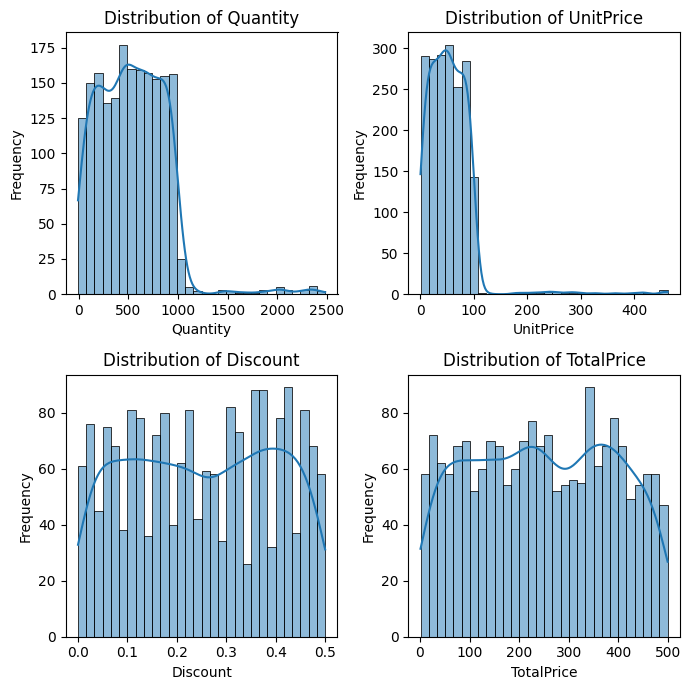

In [ ]:
# Visualization of numerical columns
numerical_columns = ['Quantity', 'UnitPrice', 'Discount', 'TotalPrice']

# Create a 2x2 grid of plots
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

# Loop through the numerical columns and create a histogram for each
for i, col in enumerate(numerical_columns):
    row = i // 2
    col_num = i % 2
    sns.histplot(df[col], bins=30, kde=True, ax=axs[row, col_num])
    axs[row, col_num].set_title(f'Distribution of {col}')
    axs[row, col_num].set_xlabel(col)
    axs[row, col_num].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

1. **Distribution of Quantity:**
   - Most transactions involve smaller quantities, with a decreasing trend as quantity increases. This suggests that customers typically purchase items in smaller quantities.
   - Consider investigating whether there are any outliers or specific patterns related to high-quantity purchases.

2. **Distribution of Unit Price:**
   - The majority of products have lower unit prices, while fewer items fall into the higher price range.
   - You might want to explore the pricing strategy for low-priced items and identify any premium products with higher unit prices.

3. **Distribution of Discount:**
   - Discounts are predominantly in the lower range. Very few transactions exhibit substantial discounts.
   - Investigate the effectiveness of different discount levels and their impact on customer behavior.

4. **Distribution of Total Price:**
   - Total prices tend to be lower overall, with only a few instances of high total prices.
   - Analyze whether specific product categories contribute significantly to these high total prices.


---
###**Q 2. What is Categorical Couts in Dataset ?**
---

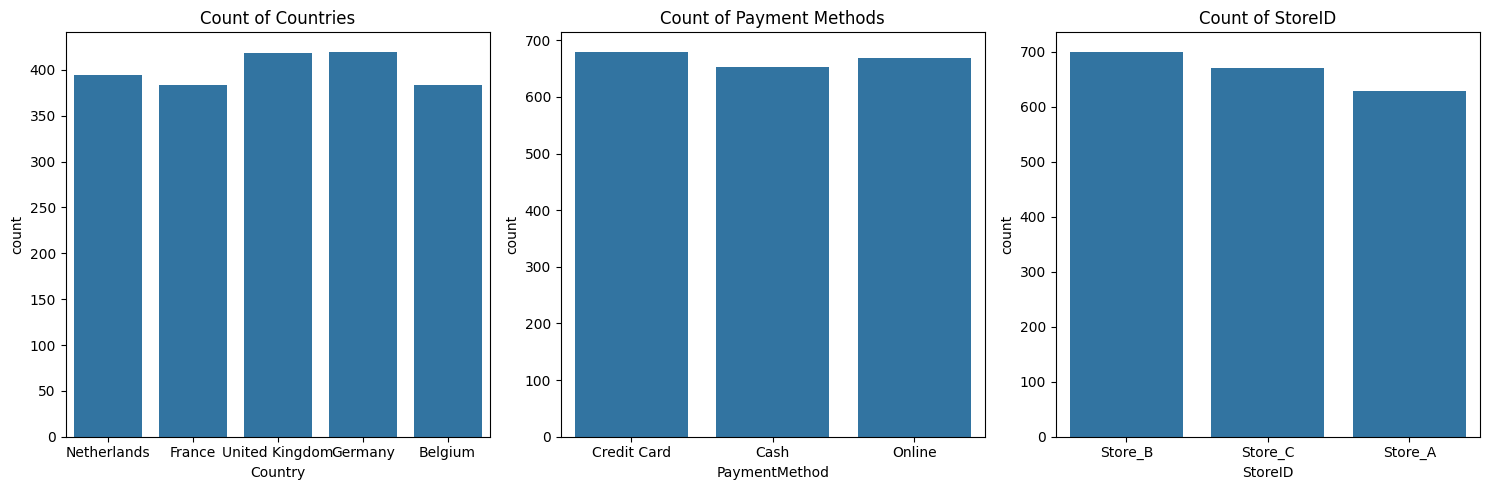

In [22]:
# Create a figure and a set of subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the countplot for 'Country' on the first subplot (axes[0])
sns.countplot(x='Country', data=df, ax=axes[0])
axes[0].set_title('Count of Countries')

# Plot the countplot for 'PaymentMethod' on the second subplot (axes[1])
sns.countplot(x='PaymentMethod', data=df, ax=axes[1])
axes[1].set_title('Count of Payment Methods')

# Plot the countplot for 'PaymentMethod' on the second subplot (axes[1])
sns.countplot(x='StoreID', data=df, ax=axes[2])
axes[2].set_title('Count of StoreID')

# Show the plot
plt.tight_layout()
plt.show()

1. **Count of Countries:**
   - The four countries—Netherlands, France, United Kingdom,Germany and Belgium —have similar transaction counts (around 400 each).
   - Consider exploring whether there are any regional trends or differences in customer behavior across these countries.

2. **Count of Payment Methods:**
   - **Credit Card** is the most commonly used payment method, with over 600 transactions.
   - **Cash** follows closely, with slightly fewer transactions (around 500).
   - **Online** payments are significantly lower in frequency compared to the other two methods.
   - Investigate why online payments are less popular and whether there are opportunities to encourage their use.

3. **Count of StoreID**
   - **Store B** is most commonly prefered by customer may be because of service it provides better than other stores
   - **Store A** is least preferred by customers among all as compared to **Store A and B**

<Axes: ylabel='count'>

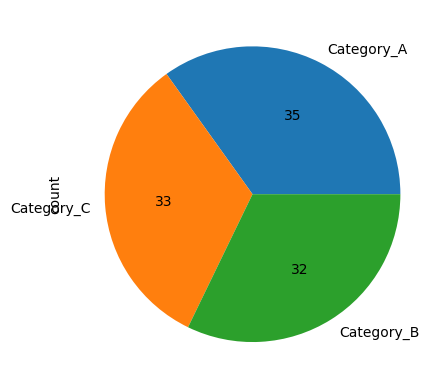

In [ ]:
# Get counts for ProductCategory in our dataset >>
df.value_counts('ProductCategory').plot(kind='pie',autopct='%.f')

# >> We can see we have more Counts for Category_A followed by Category C and then Category B

---

###**Q 3. What is the Relationship Between Quantity and Totalprice ?**

---

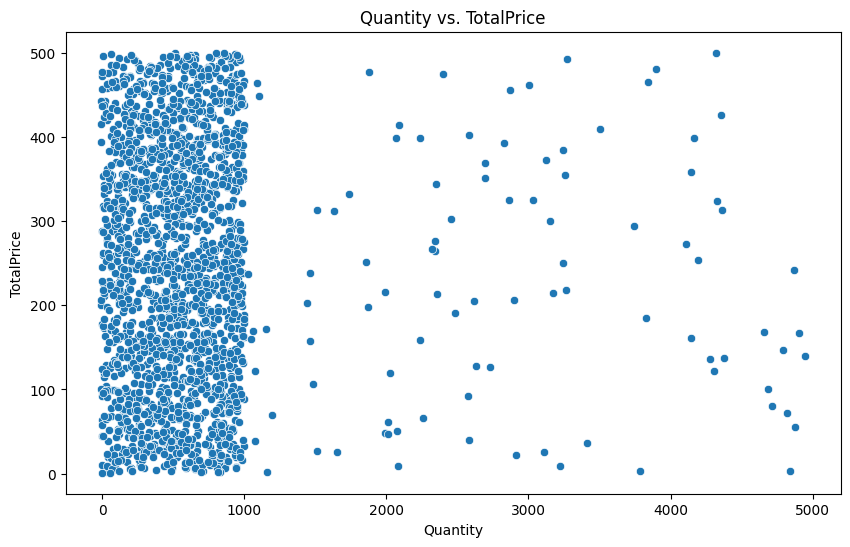

In [19]:
# Scatter plot of Quantity vs. TotalPrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='TotalPrice', data=df)
plt.title('Quantity vs. TotalPrice')
plt.xlabel('Quantity')
plt.ylabel('TotalPrice')
plt.show()

Certainly! Let's analyze the **trend between quantity and total price** in your retail dataset based on the scatter plot you provided:

  - Most data points are clustered towards the lower end of both axes, indicating that as quantity increases, total price tends to increase.
  - However, there is a wide dispersion of data points, suggesting variability in total price for similar quantities.
  - Fewer data points are observed as quantity increases beyond approximately 1000 units.

**Insights:**
   - **Positive Correlation:** Overall, there is a positive correlation between quantity and total price. As customers buy more items, the total price tends to rise.
   - **Price Variability:** Despite the trend, there's significant variability in total prices for the same quantity. Factors like product type, discounts, and individual preferences contribute to this variation.
   - **Outliers:** Investigate any high-quantity transactions with unexpectedly low or high total prices. These outliers could provide valuable insights.

**Business Implications:**
   - Pricing Strategies: Consider adjusting pricing strategies based on quantity thresholds. For example, bulk discounts or package deals.
   - Customer Behavior: Understand why some customers spend more for the same quantity. Are premium products driving higher prices?
   - Inventory Management: Optimize inventory levels based on demand patterns.


---
###**Q 4. What is the Distribution of TotalPrice by Country?**
---

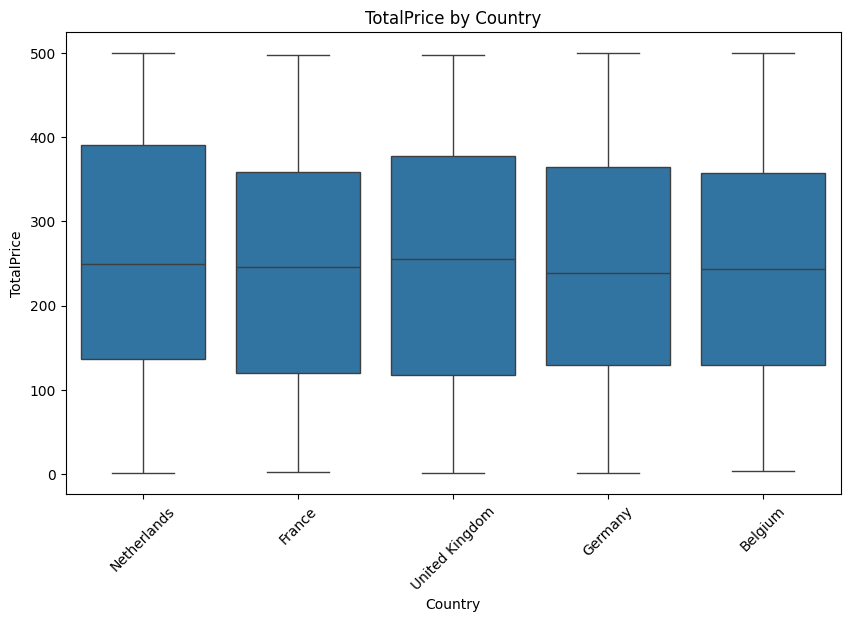

In [20]:
# Box plot of TotalPrice by Country
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='TotalPrice', data=df)
plt.title('TotalPrice by Country')
plt.xlabel('Country')
plt.ylabel('TotalPrice')
plt.xticks(rotation=45)
plt.show()


- The median total price varies across countries.
- **Netherlands** and **United Kingdom** tend to have higher median total prices.
- **Belgium** has the lowest median total price.
- Some countries have wider ranges of total prices, suggesting diverse consumer behavior.

---
###**Q 5. How Unit Price Varies With Product Category?**
---

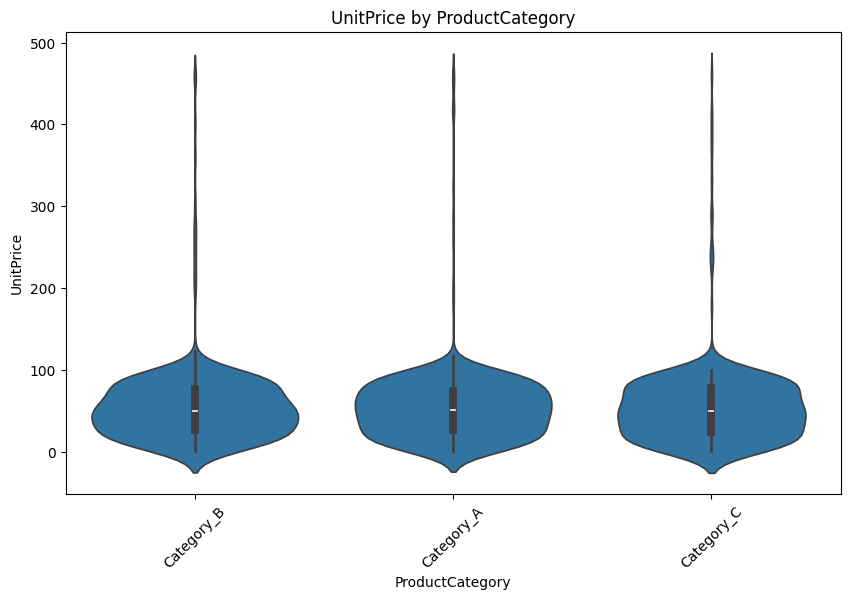

In [ ]:
# Violin plot of UnitPrice by ProductCategory
plt.figure(figsize=(10, 6))
sns.violinplot(x='ProductCategory', y='UnitPrice', data=df)
plt.title('UnitPrice by ProductCategory')
plt.xlabel('ProductCategory')
plt.ylabel('UnitPrice')
plt.xticks(rotation=45)
plt.show()


- The graph displays three product categories: **Category A**, **Category B**, and **Category C**.
- All three categories have similar **median unit prices**.
- However, there are differences in how prices are distributed within each category.
- **Category A** has a wide spread of unit prices, ranging from approximately 0 to over 400.
- **Category B** shows a more compact interquartile range (IQR) with fewer outliers.
- **Category C** has the narrowest IQR, suggesting less variability in unit prices.
- While median prices are similar, **Category A** and **Category B** exhibit more variability.
- **Category C** maintains consistent pricing across its products.

---
###**Q 6. How much amount of Qty Sold per month ?**
---

<ipython-input-53-e1e77be7b15e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Month'], y=df['Quantity'], palette='viridis')


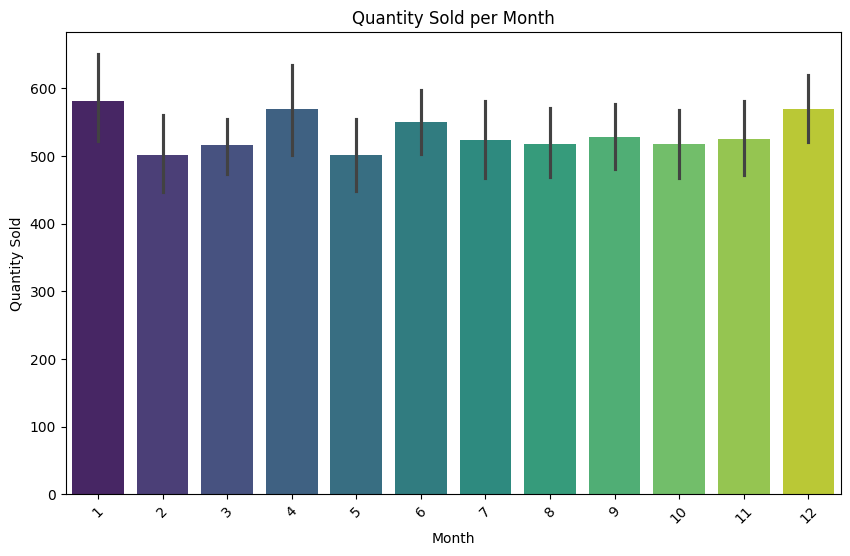

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Month'], y=df['Quantity'], palette='viridis')
plt.title('Quantity Sold per Month')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()


1. **Monthly Trends:**
   - The graph shows the quantity sold for each month of the year.
   - **December** has the highest quantity sold, reaching around **600 units**.
   - **February** and **October** also show relatively high sales.

2. **Seasonal Patterns:**
   - The peaks in **December** and **October** suggest possible holiday or seasonal demand.
   - Consider adjusting inventory management and marketing strategies accordingly.

- Overall, the quantity sold remains relatively consistent throughout the year.
- There are no drastic fluctuations, indicating stable sales patterns.



---
###**Q 7. How Total Price Varies According to months ?**
---

<ipython-input-21-2746262fb222>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Month'], y=df['TotalPrice'], palette='viridis')


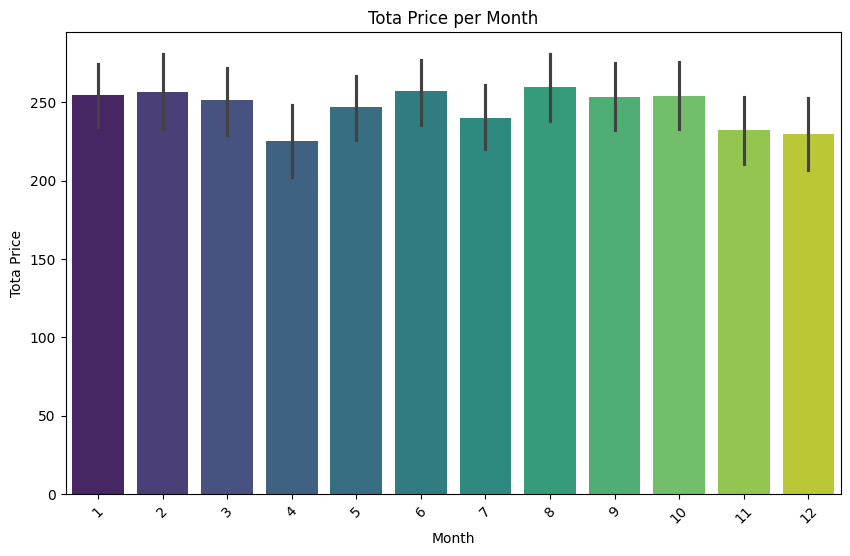

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Month'], y=df['TotalPrice'], palette='viridis')
plt.title('Tota Price per Month')
plt.xlabel('Month')
plt.ylabel('Tota Price')
plt.xticks(rotation=45)
plt.show()

As Total Price depends on Quantity sold for both the grpah is same as they are interlinked

1. **Monthly Trends:**
   - The graph shows the total price (revenue or expenses) for each month of the year.
   - **December** has the highest total price, reaching around **250 units** (assuming the y-axis represents currency or some other unit).
   - **February** and **October** also show relatively high total prices.

2. **Seasonal Patterns:**
   - The peaks in **December** and **October** suggest possible holiday or seasonal demand.
   - Consider adjusting budgeting or financial planning based on these patterns.

- Overall, the total price remains relatively consistent throughout the year.
- There are no drastic fluctuations, indicating stable financial trends.


---
###**Country Wise Summary**
---

In [ ]:
df.groupby('Country').agg({
    'TotalPrice': 'sum',
    'PaymentMethod': lambda x: x.mode()[0],  # Most frequent payment method
    'ProductCategory': lambda x: x.mode()[0],  # Most frequent product category
    'Quantity': 'sum'
}).reset_index()

,Country,TotalPrice,PaymentMethod,ProductCategory,Quantity
0,Belgium,89299.91,Credit Card,Category_C,190703
1,France,87762.07,Cash,Category_B,192054
2,Germany,96023.29,Online,Category_A,205282
3,Netherlands,94305.99,Online,Category_A,196432
4,United Kingdom,98831.62,Credit Card,Category_A,221854


### TotalPrice
- **United Kingdom** has the highest total sales with a TotalPrice of 98,831.62.
- **Germany** follows closely with a TotalPrice of 96,023.29.
- **Netherlands** and **Belgium** also have high total sales at 94,305.99 and 89,299.91, respectively.
- **France** has the lowest total sales among these countries at 87,762.07.

### PaymentMethod
- **Credit Card** is the most frequent payment method in Belgium and the United Kingdom.
- **Cash** is the most frequent payment method in France, suggesting a preference for cash transactions there.
- **Online** is the most frequent payment method in Germany and the Netherlands, indicating a trend towards online payments in these countries.

### ProductCategory
- **Category A** is the most frequent product category in Germany, Netherlands, and the United Kingdom, showing a high demand for products in this category in these countries.
- **Category B** is the most frequent product category in France.
- **Category C** is the most frequent product category in Belgium.

### Quantity
- **United Kingdom** leads in the total quantity of products sold with 221,854 units.
- **Germany** follows with 205,282 units sold.
- **Netherlands** has sold 196,432 units, indicating a high volume of sales.
- **France** has sold 192,054 units.
- **Belgium** has sold 190,703 units.

### Summary
- The United Kingdom appears to be the top-performing country in terms of both TotalPrice and Quantity, indicating a strong market presence and high customer demand.
- Germany and the Netherlands show a preference for online payment methods, which could suggest a more digital-savvy customer base in these countries.
- France, while having the lowest TotalPrice, has a unique preference for cash payments and a different leading product category (Category B), indicating different consumer behaviors compared to other countries.
- Belgium, although having the lowest Quantity, has a significant TotalPrice and a preference for Category C products.

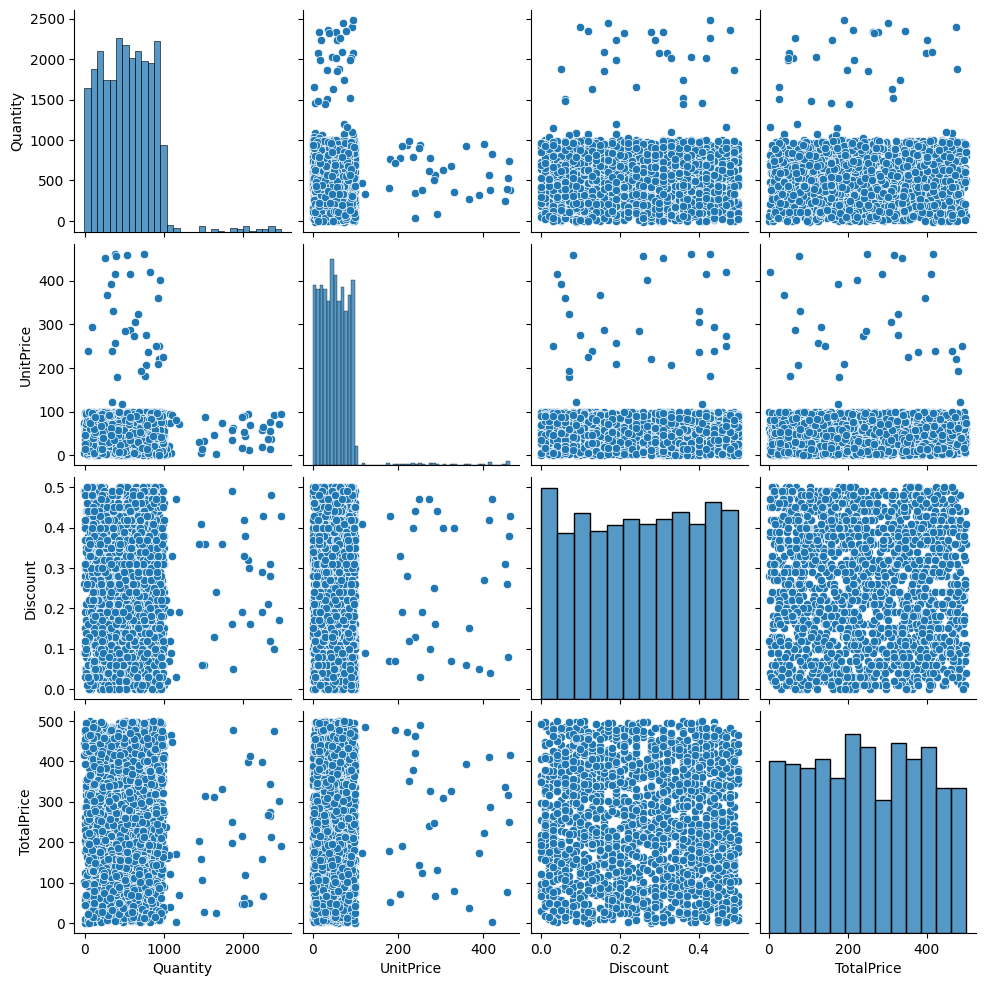

In [ ]:
# Pairplot of numerical variables >>
sns.pairplot(df[numerical_columns])
plt.show()

The graph you have provided is a pair plot (also known as a scatterplot matrix) which shows the relationships between several variables in a dataset. Let's analyze the provided graph with the following variables: Quantity, UnitPrice, Discount, and TotalPrice.

### Insights:

1. **Quantity Distribution**:
   - The distribution of **Quantity** is right-skewed, with most values concentrated below 1000.
   - There are very few observations with quantities exceeding 1000.

2. **UnitPrice Distribution**:
   - The distribution of **UnitPrice** is also right-skewed, with most prices below 100.
   - There are a few high-priced items, with prices going up to around 400.

3. **Discount Distribution**:
   - The **Discount** variable seems uniformly distributed, indicating discounts are spread across a range from 0 to 0.5.

4. **TotalPrice Distribution**:
   - The **TotalPrice** distribution shows a concentration below 100, with some observations going up to around 500.

### Pairwise Relationships:

1. **Quantity vs. UnitPrice**:
   - There appears to be a negative relationship where higher quantities correspond to lower unit prices, suggesting bulk purchasing discounts.

2. **Quantity vs. Discount**:
   - No clear pattern is visible, indicating that discounts are not strongly dependent on quantity.

3. **Quantity vs. TotalPrice**:
   - A positive relationship is evident as higher quantities generally lead to higher total prices, which is expected.

4. **UnitPrice vs. Discount**:
   - There is no obvious pattern here, suggesting that discounts are not strongly correlated with the unit price.

5. **UnitPrice vs. TotalPrice**:
   - The plot shows some vertical clustering, suggesting that total price variability is more influenced by quantity than unit price.

6. **Discount vs. TotalPrice**:
   - There is no clear relationship between discount and total price, indicating that discounts are uniformly applied across different total price ranges.

### General Observations:

- The variables **Quantity** and **TotalPrice** are positively correlated, as larger quantities result in higher total prices.
- **UnitPrice** has a weak relationship with **TotalPrice**, indicating that the total price is more sensitive to changes in quantity rather than unit price.
- Discounts appear to be uniformly applied without a clear dependency on other variables, which might imply a standardized discount policy.
